<a href="https://colab.research.google.com/github/Gokula264/online-quiz-application/blob/main/6_to_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Load the dataset
dataset = pd.read_csv("/content/NaiveBayes.csv")

# Display the structure of the dataset
print(dataset.head())
print(dataset.columns)

# Adjust these indices based on the actual structure of your dataset
# For example, if your dataset has 'Feature1', 'Feature2', 'Target'
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)  # Use transform here

# Initialize and fit the classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print('Accuracy Metrics:')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred, average='binary'))  # Adjust average method if needed
print('Precision: ', precision_score(y_test, y_pred, average='binary'))  # Adjust average method if needed
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


   Feature1  Feature2  Target
0         1         1       0
1         2         2       0
2         3         3       0
3         4         4       0
4         5         5       1
Index(['Feature1', 'Feature2', 'Target'], dtype='object')
Accuracy Metrics:
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


In [10]:
!pip install pgmpy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [11]:
import numpy as np
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

# Load the dataset
heartDisease = pd.read_csv("/content/heartdisease.csv")

# Replace missing values with NaN
heartDisease = heartDisease.replace('?', np.nan)

# Print sample instances from the dataset
print('Sample instances from the dataset are given below')
print(heartDisease.head())

# Print attributes and datatypes
print('\nAttributes and datatypes')
print(heartDisease.dtypes)

# Define the Bayesian Network model
model = BayesianNetwork([('age', 'heartdisease'),
                         ('Gender', 'heartdisease'),
                         ('Family', 'heartdisease'),
                         ('diet', 'heartdisease'),
                         ('Lifestyle', 'heartdisease'),
                         ('cholestrol', 'heartdisease')])

# Learn the Conditional Probability Distributions (CPDs) using Maximum Likelihood Estimator
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

# Perform inference with Bayesian Network
HeartDiseasetest_infer = VariableElimination(model)

# Query the model
print('\n1. Probability of HeartDisease given evidence= cholestrol')
q1 = HeartDiseasetest_infer.query(variables=['heartdisease'], evidence={'cholestrol': 1})
print(q1)

print('\n2. Probability of HeartDisease given evidence= cholestrol')
q2 = HeartDiseasetest_infer.query(variables=['heartdisease'], evidence={'cholestrol': 2})
print(q2)

Sample instances from the dataset are given below
   age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0    0       0       1     1          3           0             1
1    0       1       1     1          3           0             1
2    1       0       0     0          2           1             1
3    4       0       1     1          3           2             0
4    3       1       1     0          0           2             0

Attributes and datatypes
age             int64
Gender          int64
Family          int64
diet            int64
Lifestyle       int64
cholestrol      int64
heartdisease    int64
dtype: object

Learning CPD using Maximum likelihood estimators

1. Probability of HeartDisease given evidence= cholestrol
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.5114 |
+-----------------+---------------------+
| heartdisease(1) |              0.4886 |

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The accuracy score of K-Mean:  0.24
The Confusion matrix of K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:
  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]


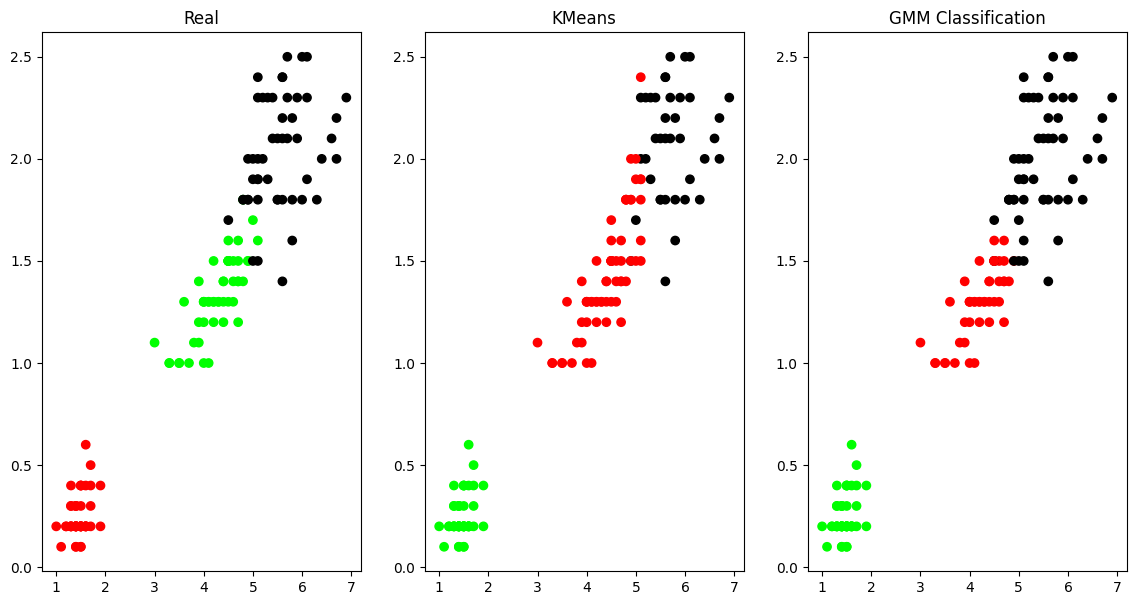

In [12]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']

# Load the iris dataset
iris = load_iris()
dataset = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=names)

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

plt.subplot(1,3,1)
plt.title('Real')
# Convert y to integers for indexing
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.astype(int)])

model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_])

print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The Confusion matrix of K-Mean:\n',metrics.confusion_matrix(y, model.labels_))

gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm])

print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))

plt.show()

In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Define column names
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset into pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.head())

# Split dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10)

# Initialize and train the classifier
classifier = KNeighborsClassifier(n_neighbors=5).fit(Xtrain, ytrain)

# Make predictions
ypred = classifier.predict(Xtest)

# Print results
i = 0
print("\n-------------------------------------------------------------------------")
print('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print("-------------------------------------------------------------------------")
for label in ytest:
    print('%-25s %-25s' % (label, ypred[i]), end="")
    if label == ypred[i]:
        print(' %-25s' % ('Correct'))
    else:
        print(' %-25s' % ('Wrong'))
    i = i + 1
print("-------------------------------------------------------------------------")

# Print evaluation metrics
print("\nConfusion Matrix:\n", metrics.confusion_matrix(ytest, ypred))
print("-------------------------------------------------------------------------")
print("\nClassification Report:\n", metrics.classification_report(ytest, ypred))
print("-------------------------------------------------------------------------")
print('Accuracy of the classifier is %0.2f' % metrics.accuracy_score(ytest, ypred))
print("-------------------------------------------------------------------------")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
1                         1                         Correct                  
1                         1                         Correct                  
1                         2                         Wrong                    
2                         2                         Correct                  
2    